<a href="https://colab.research.google.com/github/keirabasma/Formation-IA/blob/main/Workshp_Part_2_KADRI_Ahlem_Chahinez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'colab'  # Pour afficher Plotly dans Colab

print("✓ Bibliothèques importées avec succès")


✓ Bibliothèques importées avec succès


In [2]:
from google.colab import files
uploaded = files.upload()

Saving cars.csv to cars.csv


In [4]:
# Charger le fichier CSV
df = pd.read_csv('cars.csv')

# Afficher les premières lignes
print("✓ Dataset chargé avec succès")
print(f"Taille du dataset : {df.shape}")
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")
print("\nAperçu des données :")
display(df.head())

✓ Dataset chargé avec succès
Taille du dataset : (15411, 14)
Nombre de lignes : 15411
Nombre de colonnes : 14

Aperçu des données :


,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [5]:
# 3. EXPLORATION DU DATASET
print("\n3. EXPLORATION DES DONNÉES...")

# Informations générales
print("\n3.1 Informations sur le dataset :")
print(df.info())

# Statistiques descriptives
print("\n3.2 Statistiques descriptives :")
print(df.describe())

# Vérifier les valeurs manquantes
print("\n3.3 Valeurs manquantes par colonne :")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Types de données
print("\n3.4 Types de données :")
print(df.dtypes)


3. EXPLORATION DES DONNÉES...

3.1 Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  price              15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6

In [6]:
# 4. NETTOYAGE ET PRÉPARATION DES DONNÉES
print("\n4. NETTOYAGE DES DONNÉES...")

# Supprimer la colonne d'index inutile si elle existe
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)
    print("✓ Colonne d'index supprimée")

# Convertir les colonnes numériques si nécessaire
numeric_cols = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'price']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Gestion des valeurs manquantes (exemple simple)
initial_rows = df.shape[0]
df.dropna(subset=['price'], inplace=True)  # Supprimer les lignes sans prix
print(f"✓ Lignes supprimées sans prix : {initial_rows - df.shape[0]}")

print(f"\n✓ Nettoyage terminé. Nouvelle taille : {df.shape}")


4. NETTOYAGE DES DONNÉES...
✓ Colonne d'index supprimée
✓ Lignes supprimées sans prix : 0

✓ Nettoyage terminé. Nouvelle taille : (15411, 13)



5. VISUALISATIONS AVEC MATPLOTLIB & SEABORN...


/tmp/ipython-input-3377253347.py:55: UserWarning:

Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.



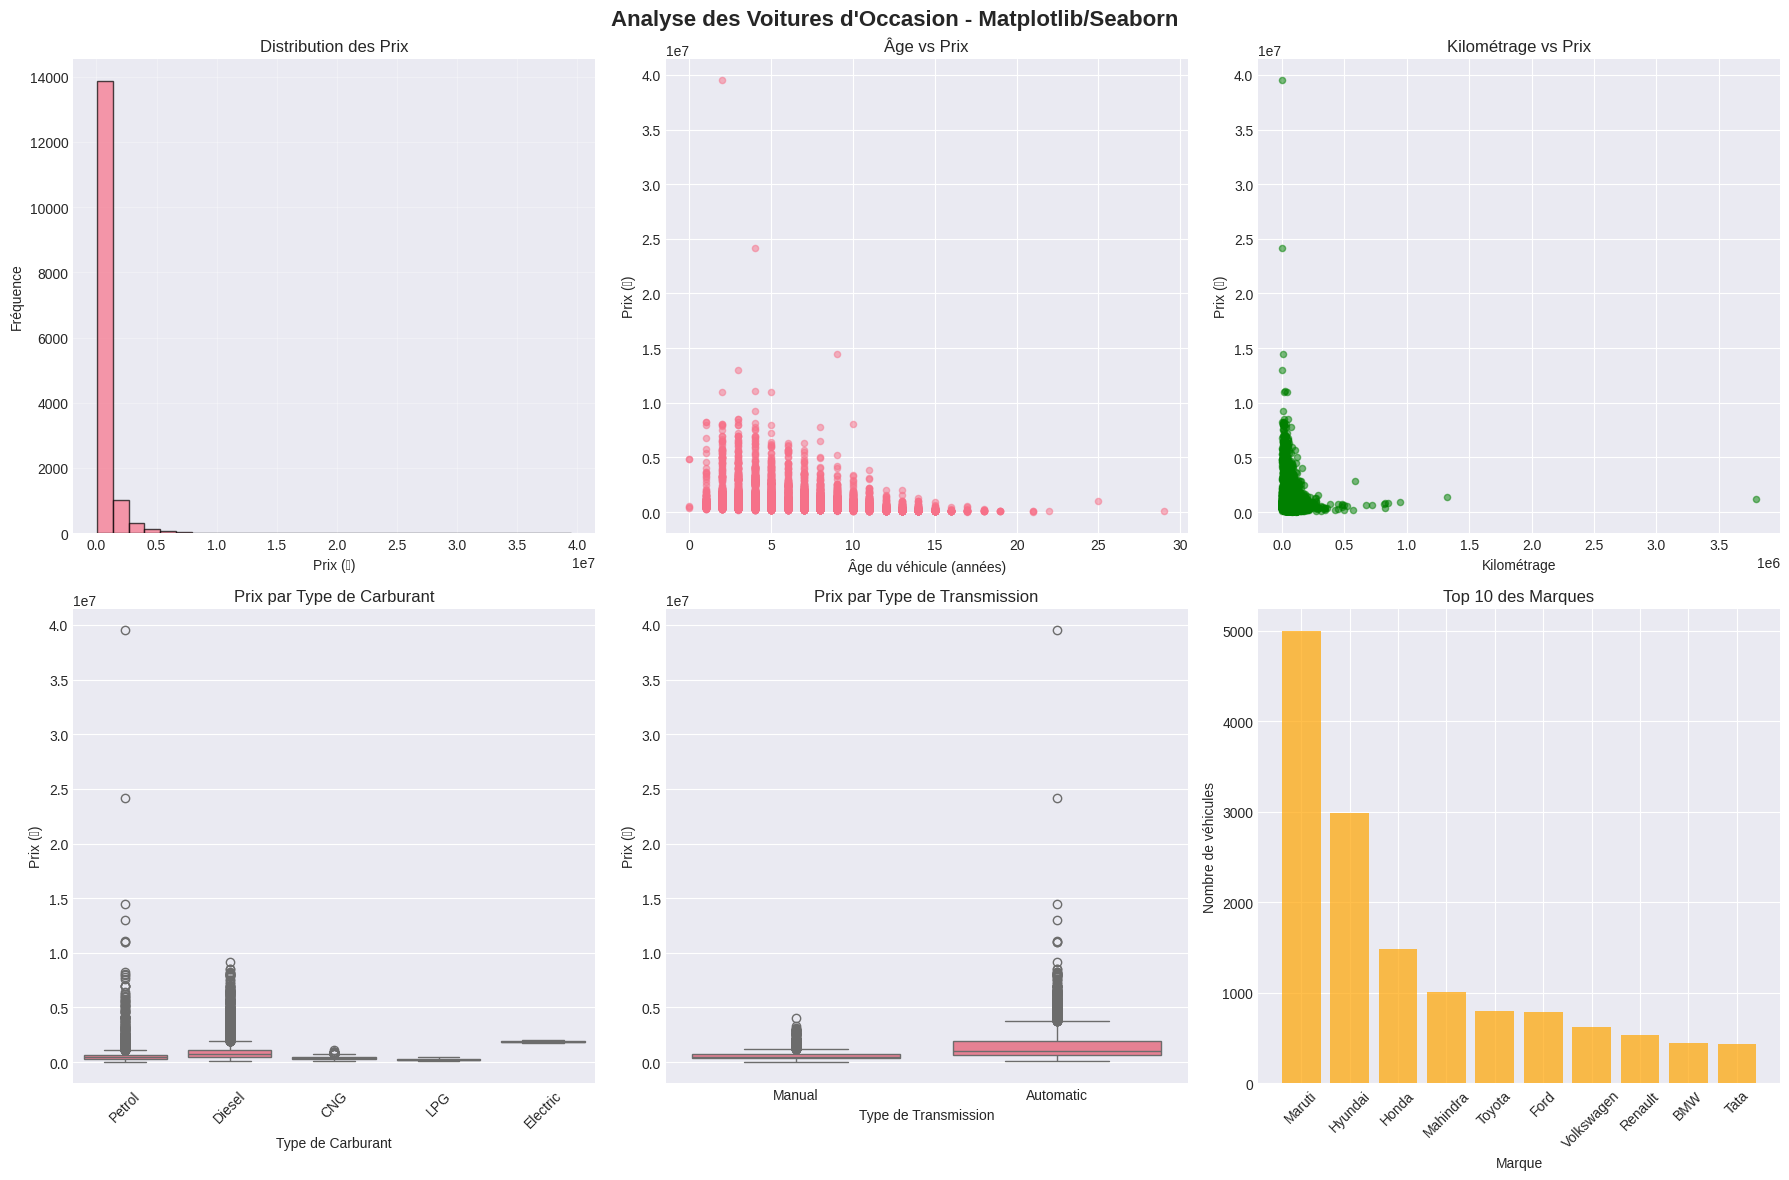


5.7 Matrice de corrélations...


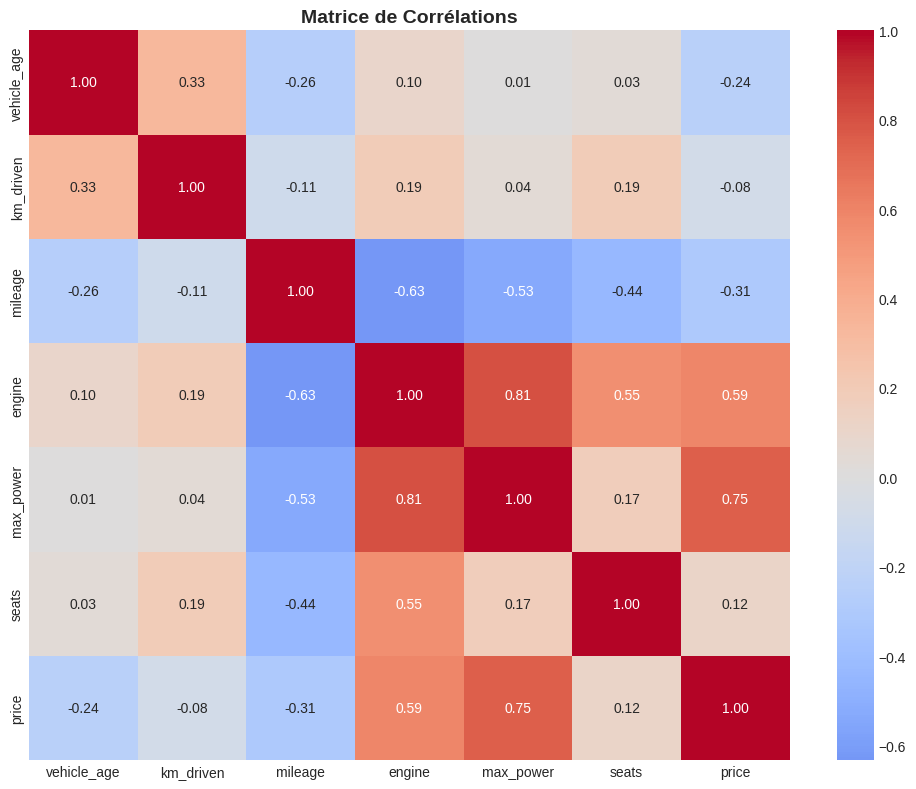


5.8 Pairplot (échantillon de 200 véhicules)...


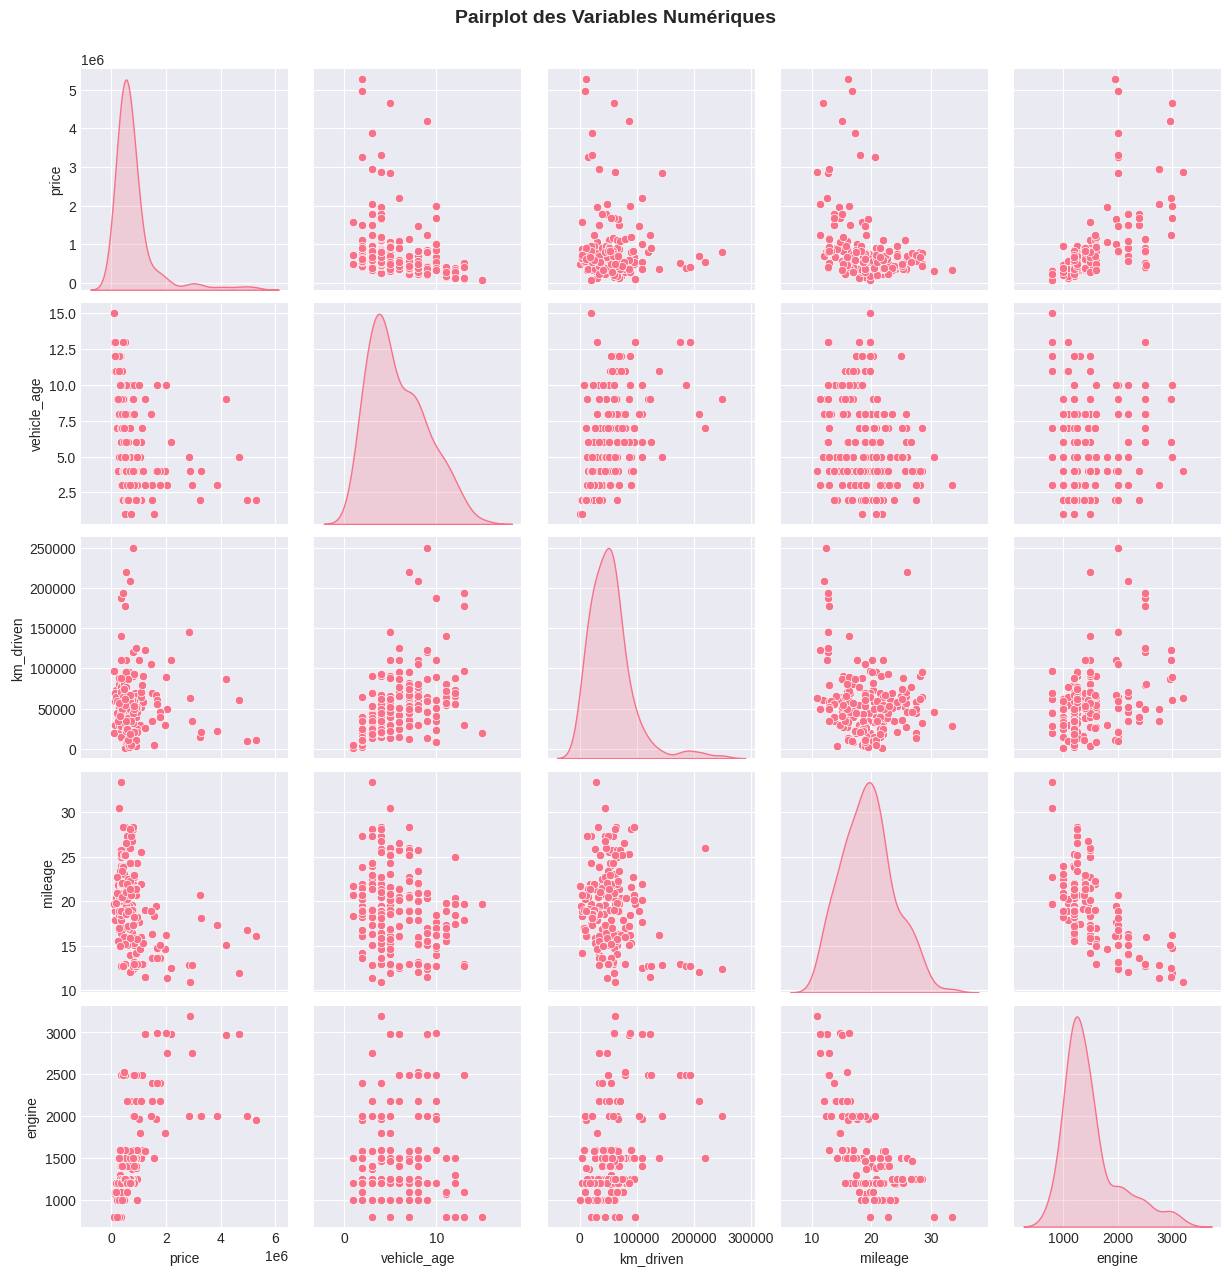

In [8]:
# 5. ANALYSE EXPLORATOIRE AVEC MATPLOTLIB & SEABORN
print("\n5. VISUALISATIONS AVEC MATPLOTLIB & SEABORN...")

# Configuration du style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Création d'une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Analyse des Voitures d\'Occasion - Matplotlib/Seaborn', fontsize=16, fontweight='bold')

# 5.1 Distribution des prix
axes[0, 0].hist(df['price'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution des Prix')
axes[0, 0].set_xlabel('Prix (₹)')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].grid(True, alpha=0.3)

# 5.2 Âge des véhicules vs Prix
axes[0, 1].scatter(df['vehicle_age'], df['price'], alpha=0.5, s=20)
axes[0, 1].set_title('Âge vs Prix')
axes[0, 1].set_xlabel('Âge du véhicule (années)')
axes[0, 1].set_ylabel('Prix (₹)')

# 5.3 Kilométrage vs Prix
axes[0, 2].scatter(df['km_driven'], df['price'], alpha=0.5, s=20, c='green')
axes[0, 2].set_title('Kilométrage vs Prix')
axes[0, 2].set_xlabel('Kilométrage')
axes[0, 2].set_ylabel('Prix (₹)')

# 5.4 Boxplot des prix par type de carburant
if 'fuel_type' in df.columns:
    sns.boxplot(ax=axes[1, 0], x='fuel_type', y='price', data=df)
    axes[1, 0].set_title('Prix par Type de Carburant')
    axes[1, 0].set_xlabel('Type de Carburant')
    axes[1, 0].set_ylabel('Prix (₹)')
    axes[1, 0].tick_params(axis='x', rotation=45)

# 5.5 Boxplot des prix par type de transmission
if 'transmission_type' in df.columns:
    sns.boxplot(ax=axes[1, 1], x='transmission_type', y='price', data=df)
    axes[1, 1].set_title('Prix par Type de Transmission')
    axes[1, 1].set_xlabel('Type de Transmission')
    axes[1, 1].set_ylabel('Prix (₹)')

# 5.6 Top 10 des marques les plus courantes
if 'brand' in df.columns:
    top_brands = df['brand'].value_counts().head(10)
    axes[1, 2].bar(top_brands.index, top_brands.values, color='orange', alpha=0.7)
    axes[1, 2].set_title('Top 10 des Marques')
    axes[1, 2].set_xlabel('Marque')
    axes[1, 2].set_ylabel('Nombre de véhicules')
    axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 5.7 Heatmap des corrélations (figure séparée)
print("\n5.7 Matrice de corrélations...")
plt.figure(figsize=(10, 8))

# CORRECTION SIMPLE : s'assurer que np est disponible
if 'np' not in globals():
    import numpy as np

numeric_df = df.select_dtypes(include=[np.number])
if not numeric_df.empty and len(numeric_df.columns) > 1:
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Matrice de Corrélations', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("Pas assez de données numériques pour la corrélation")
    plt.close()

# 5.8 Pairplot des variables numériques (échantillon pour performance)
print("\n5.8 Pairplot (échantillon de 200 véhicules)...")
sample_df = df.sample(min(200, len(df)), random_state=42)
numeric_cols_for_pairplot = ['price', 'vehicle_age', 'km_driven', 'mileage', 'engine']
numeric_cols_for_pairplot = [col for col in numeric_cols_for_pairplot if col in df.columns]

if len(numeric_cols_for_pairplot) >= 2:
    sns.pairplot(sample_df[numeric_cols_for_pairplot], diag_kind='kde')
    plt.suptitle('Pairplot des Variables Numériques', y=1.02, fontsize=14, fontweight='bold')
    plt.show()


In [9]:
# 6. VISUALISATIONS AVEC PLOTLY (INTERACTIVES)
print("\n6. VISUALISATIONS INTERACTIVES AVEC PLOTLY...")

# 6.1 Scatter plot interactif : Âge vs Prix avec couleur par carburant
print("6.1 Graphique interactif : Âge vs Prix...")
if 'fuel_type' in df.columns and 'vehicle_age' in df.columns and 'price' in df.columns:
    fig1 = px.scatter(df, x='vehicle_age', y='price',
                     color='fuel_type',
                     hover_data=['car_name', 'brand', 'km_driven', 'transmission_type'],
                     title='Âge du Véhicule vs Prix (par Type de Carburant)',
                     labels={'vehicle_age': 'Âge (années)', 'price': 'Prix (₹)'})
    fig1.update_layout(template='plotly_white')
    fig1.show()
else:
    print("Colonnes nécessaires manquantes pour le scatter plot")

# 6.2 Histogramme interactif des prix
print("\n6.2 Histogramme interactif des prix...")
if 'price' in df.columns:
    fig2 = px.histogram(df, x='price', nbins=50,
                       title='Distribution des Prix des Voitures',
                       labels={'price': 'Prix (₹)', 'count': 'Nombre de véhicules'},
                       opacity=0.7)
    fig2.update_layout(bargap=0.1, template='plotly_white')
    fig2.show()

# 6.3 Boxplot interactif par type de transmission
print("\n6.3 Boxplot interactif par transmission...")
if 'transmission_type' in df.columns and 'price' in df.columns:
    fig3 = px.box(df, x='transmission_type', y='price',
                 color='transmission_type',
                 title='Distribution des Prix par Type de Transmission',
                 labels={'transmission_type': 'Transmission', 'price': 'Prix (₹)'})
    fig3.update_layout(template='plotly_white', showlegend=False)
    fig3.show()

# 6.4 Bar chart interactif : Top 15 des marques
print("\n6.4 Top 15 des marques les plus courantes...")
if 'brand' in df.columns:
    brand_counts = df['brand'].value_counts().head(15).reset_index()
    brand_counts.columns = ['brand', 'count']

    fig4 = px.bar(brand_counts, x='brand', y='count',
                 color='count',
                 title='Top 15 des Marques les Plus Représentées',
                 labels={'brand': 'Marque', 'count': 'Nombre de véhicules'},
                 text_auto=True)
    fig4.update_layout(template='plotly_white', xaxis_tickangle=-45)
    fig4.show()

# 6.5 Heatmap interactive des corrélations
print("\n6.5 Heatmap interactive des corrélations...")
if not numeric_df.empty and len(numeric_df.columns) > 1:
    corr_matrix = numeric_df.corr()

    fig5 = px.imshow(corr_matrix,
                    text_auto=True,
                    aspect="auto",
                    color_continuous_scale='RdBu',
                    title='Matrice de Corrélations (Interactive)',
                    labels=dict(color="Corrélation"))
    fig5.update_layout(template='plotly_white')
    fig5.show()

# 6.6 Sunburst chart (hiérarchique)
print("\n6.6 Diagramme hiérarchique (Sunburst)...")
if all(col in df.columns for col in ['brand', 'fuel_type', 'transmission_type']):
    # Créer un échantillon pour éviter la surcharge
    sample_for_sunburst = df.sample(min(500, len(df)), random_state=42)

    fig6 = px.sunburst(sample_for_sunburst,
                      path=['brand', 'fuel_type', 'transmission_type'],
                      title='Répartition Hiérarchique des Véhicules',
                      width=800, height=800)
    fig6.show()


6. VISUALISATIONS INTERACTIVES AVEC PLOTLY...
6.1 Graphique interactif : Âge vs Prix...



6.2 Histogramme interactif des prix...



6.3 Boxplot interactif par transmission...



6.4 Top 15 des marques les plus courantes...



6.5 Heatmap interactive des corrélations...



6.6 Diagramme hiérarchique (Sunburst)...
